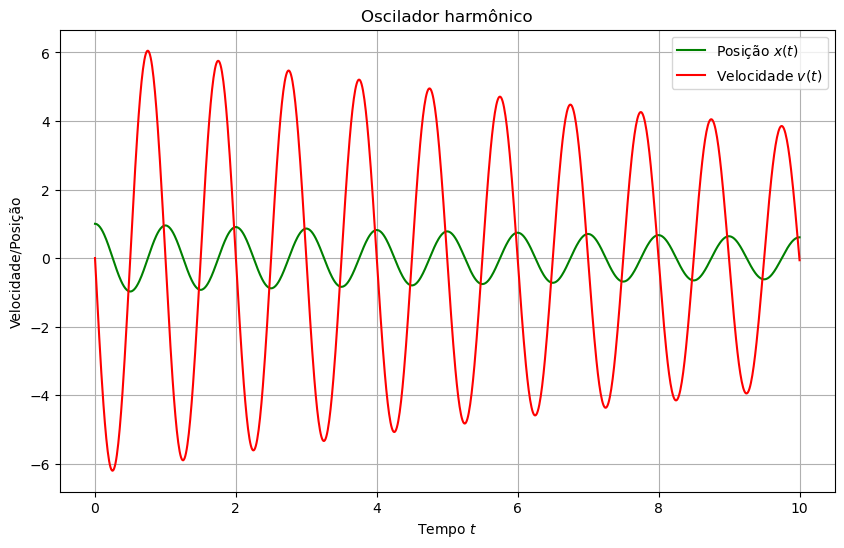

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

w0 = 2*np.pi  # Frequência angular
b = 0.1

# Definir o sistema de EDOs: dy/dt = f(t, y)
def oscilador(t, y):
    '''
     Resolve oscilador harmonico por redução de ordem

     Args:
       y = [x, v]
       dxdt = v
       dvdt = -w0**2 * x - b * v

    Returns:
       [dxdt, dvdt]


    '''
    x, v = y  # y = [x, v]
    dxdt = v
    dvdt = -w0**2 * x - b * v
    return [dxdt, dvdt]

# Condições iniciais [x0, v0]
y0 = [1.0, 0.0]

# Intervalo de tempo [t0, tf]
t0 = 0.0
tf = 10.0
t_span = (t0, tf)

# Resolver o sistema de EDOs por rk4
sol = solve_ivp(oscilador, t_span, y0, t_eval=np.linspace(t0, tf, 1000))
t = sol.t
x = sol.y[0]  # Posição de x
v = sol.y[1]  # Velocidade

#Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Posição $x(t)$', color='green')
plt.plot(t, v, label='Velocidade $v(t)$', color='red')
plt.xlabel('Tempo $t$')
plt.ylabel('Velocidade/Posição')
plt.title('Oscilador harmônico')
plt.legend()
plt.grid(True)
plt.show()

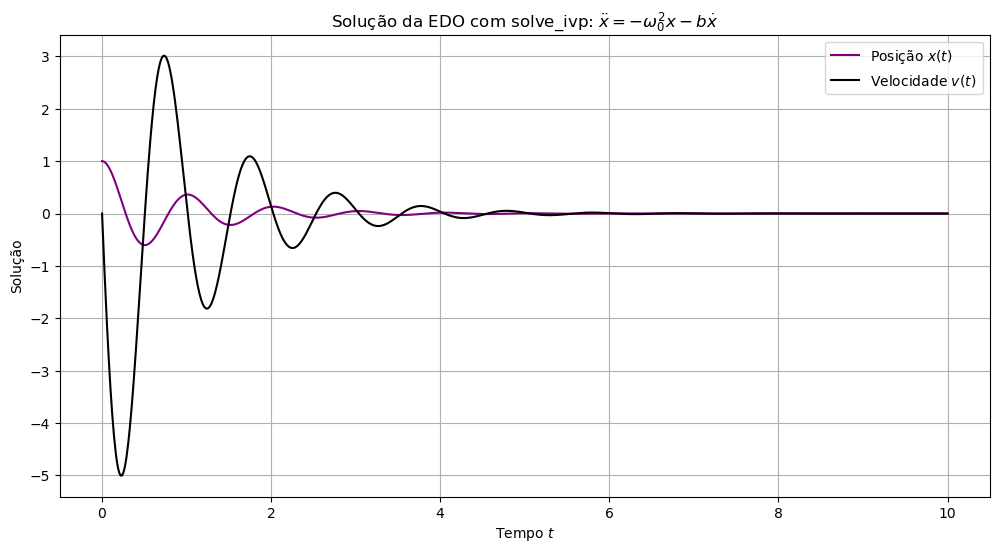

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

w0 = 2*np.pi
b = 2

# Definir o sistema de EDOs: dy/dt = f(t, y)
def sistema_edo(t, y):
    '''
     Resolve o sistema de EDOs por runge-kutta 4

     Args:
       y = [x, v]
       dxdt = v
       dvdt = -omega0**2 * x - b * v

    Returns:
       [dxdt, dvdt]
    '''



    x, v = y
    dxdt = v
    dvdt = -w0**2 * x - b * v
    return [dxdt, dvdt]

# Condições iniciais [x0, v0]
y0 = [1.0, 0.0]

# Intervalo de tempo e pontos de avaliação
t_span = (0.0, 10.0)
t_eval = np.linspace(0, 10, 1000)

sol = solve_ivp(sistema_edo, t_span, y0, t_eval=t_eval)

# Resultados
t = sol.t
x = sol.y[0]
v = sol.y[1]

#Gráficos
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Posição $x(t)$', color='purple', linestyle='-')
plt.plot(t, v, label='Velocidade $v(t)$ ', color='black', linestyle='-')
plt.xlabel('Tempo $t$')
plt.ylabel('Solução')
plt.title('Solução da EDO com solve_ivp: $\\ddot{x} = -\\omega_0^2 x - b \\dot{x}$')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

w0 = 2*np.pi  # Frequência natural
b = 2         # Coeficiente de amortecimento
m = 1.0       # Massa (adicionada para termos físicos completos)

x0 = 1.0      # Posição inicial
v0 = 0.0      # Velocidade inicial
dt = 0.01     # Passo de tempo
t_max = 10.0  # Tempo máximo
n_steps = int(t_max/dt)

# Arrays para armazenar os resultados
t = np.zeros(n_steps)
x = np.zeros(n_steps)
v = np.zeros(n_steps)

# Inicialização
t[0] = 0.0
x[0] = x0
v[0] = v0

# Força: F = -kx -bv = -mω²x -bv
def forca(x, v):
    return -m*w0**2*x - b*v

# Método de Verlet
for i in range(1, n_steps):
    t[i] = t[i-1] + dt

    x[i] = x[i-1] + v[i-1]*dt + 0.5*(forca(x[i-1], v[i-1])/m)*dt**2
    v_inter = v[i-1] + 0.5*(forca(x[i-1], v[i-1])/m)*dt
    f_new = forca(x[i], v_inter)
    v[i] = v_inter + 0.5*(f_new/m)*dt

#   Figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Oscilador Harmônico Amortecido - Método de Verlet')

# Configurar eixos
ax1.set_xlim(0, t_max)
ax1.set_ylim(-1.5, 1.5)
ax1.set_ylabel('Posição')
ax1.grid(True)

ax2.set_xlim(0, t_max)
ax2.set_ylim(-10, 10)
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade')
ax2.grid(True)

# Criar elementos gráficos
line1, = ax1.plot([], [], 'purple', lw=2, label='Posição')
line2, = ax2.plot([], [], 'black', lw=2, label='Velocidade')
ax1.legend()
ax2.legend()

# Função de inicialização
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Animação
def animate(i):
    line1.set_data(t[:i], x[:i])
    line2.set_data(t[:i], v[:i])
    return line1, line2

ani = FuncAnimation(fig, animate, frames=n_steps, init_func=init,
                    interval=20, blit=True)

# Converter para HTML
plt.close()
html_output = HTML(ani.to_html5_video())

# Exibir
html_output